In [9]:
import matplotlib
import numpy as np
from math import cos, pi
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

# define scheduler of learing rate

In [10]:
class LearningRateScheduler(object):
    def __init__(self, base_lr, final_lr, max_steps, steps, warmup_steps, lr_scale=1.0):
        self.base_lr = base_lr
        self.final_lr = final_lr
        self.max_steps = max_steps
        self.warmup_steps = warmup_steps
        self.lr_scale = lr_scale
        self.steps = [warmup_steps] + steps
        self.left = 0
        self.right = 0

    def update(self, step):
        # warmup
        if step < self.warmup_steps:
            new_lr = self.final_lr + (self.base_lr - self.final_lr) / self.warmup_steps * step

        # learning rate restart
        else:
            if step in self.steps[1:]:
                self.base_lr *= self.lr_scale

            for i in range(len(self.steps) - 1):
                self.left = self.steps[i]
                self.right = self.steps[i + 1]
                if self.steps[i] <= step < self.steps[i + 1]:
                    break
                elif step > self.steps[-1]:
                    return self.final_lr

            new_lr = self.final_lr + (self.base_lr - self.final_lr) * \
                     (1 + cos(pi * (step - self.left) / (self.right - self.left))) / 2
        return new_lr

In [11]:
def plot_curve(lr_list):
    plt.figure()
    plt.plot(lr_list, lw=3)
    plt.xlabel("epoch")
    plt.ylabel("learning rate")
    plt.tight_layout()
    plt.grid()
#     plt.savefig("learning rate vs epoch.png")
    plt.show()

# Main

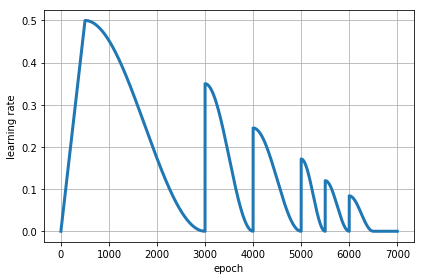

Minimun learning rate: 0.0001


In [15]:
def main():
    base_lr   = 0.5
    final_lr  = 0.0001
    max_steps = 7000
    milestore_steps = [3000, 4000, 5000, 5500, 6000, 6500]
    warmup_step = 500
    lr_scale = 0.7

    schedule = LearningRateScheduler(
        base_lr=base_lr,
        final_lr=final_lr,
        steps = milestore_steps,
        max_steps = max_steps,
        warmup_steps=warmup_step,
        lr_scale=lr_scale)

    lr_list = []
    for step in range(max_steps):
        new_lr = schedule.update(step)
        lr_list.append(new_lr)

    plot_curve(lr_list)
    print("Minimun learning rate:", lr_list[-1])

if __name__ == '__main__':
    main()